In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [95]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [96]:
X = data.drop('Class', axis=1) # Contains all features
Y = data['Class'] # Contains all labels (Fraud or not)

In [97]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
# Splitting Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [99]:
# Train autoencoder on normal transactions (class = 0)
X_train_normal = X_train[Y_train == 0]
X_test_normal = X_test[Y_test == 0]
X_test_fraud = X_test[Y_test == 1]

In [100]:
input_dim = X_train_normal.shape[1] # 30 features in credit card dataset
encoding_dim = 16 # Size of the encoding layer (latent space)

In [101]:
# Define autoencoder model
autoencoder = Sequential([
    # Encoder network: Reducing the dimensions gradually
    Dense(encoding_dim, activation='relu', input_shape=(input_dim,)),
    Dense(8, activation="relu"),
    Dense(4, activation="relu"),

    # Decoder network: Expanding back to original dimension
    Dense(8, activation='relu'),
    Dense(encoding_dim, activation='relu'),
    Dense(input_dim, activation='sigmoid') # Use sigmoid for binary data between 0 and 1
])

C:\Users\amito\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])
autoencoder.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)                    │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 30)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,362 (5.32 KB)

 Trainable params: 1,362 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
#Train the autoencoder
history = autoencoder.fit(X_train_normal, X_train_normal, epochs=50, verbose=1, validation_split=0.2, shuffle=True, batch_size=32)

Epoch 1/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0923 - loss: 0.9587 - val_accuracy: 0.1711 - val_loss: 0.8871
Epoch 2/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.1937 - loss: 0.8508 - val_accuracy: 0.2486 - val_loss: 0.8645
Epoch 3/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.2568 - loss: 0.8465 - val_accuracy: 0.2780 - val_loss: 0.8556
Epoch 4/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.2725 - loss: 0.8317 - val_accuracy: 0.2805 - val_loss: 0.8503
Epoch 5/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2818 - loss: 0.8313 - val_accuracy: 0.2941 - val_loss: 0.8471
Epoch 6/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2932 - loss: 0.8250 - val_accuracy: 0.2987 - val_loss: 0.8448
Epoch 7/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2909 - loss: 0.8137 - val_accuracy: 0.2928 - val_loss: 0.8431
Epoch 8/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.2897 - loss: 0.8175 - 

In [104]:
# Make predictions (reconstructions) on test data
reconstructions = autoencoder.predict(X_test)

# Calculate reconstructions errors
reconstruction_errors = np.mean(np.square(X_test - reconstructions), axis=1)

threshold = np.percentile(reconstruction_errors, 95)

anomalies = reconstruction_errors > threshold

print(classification_report(y_test, anomalies))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



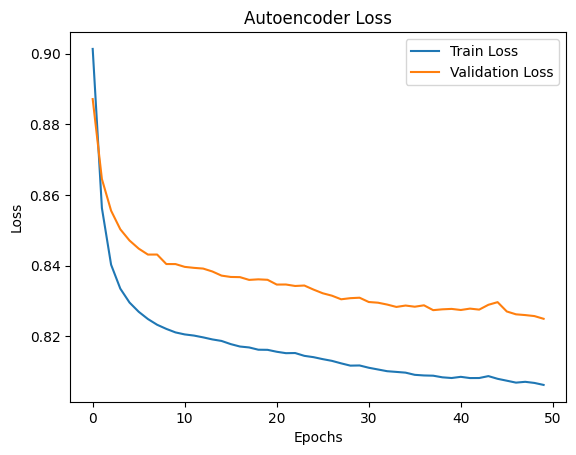

In [107]:
#Plot train and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

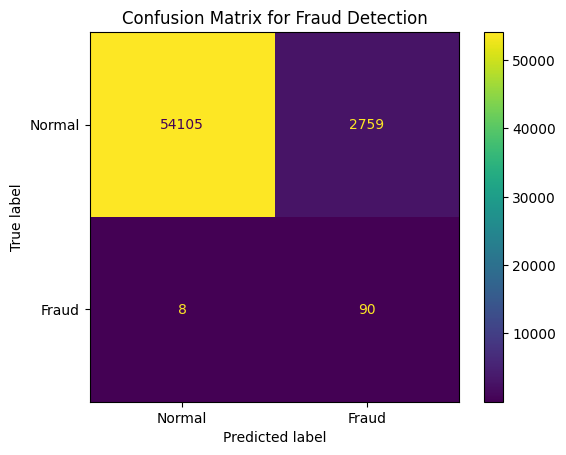

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(Y_test, anomalies)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Fraud'])
plt.figure(figsize=(8,6))
disp.plot()
plt.title('Confusion Matrix for Fraud Detection')
plt.show()
